# First Steps: 
Change the working directory to TRINA so you can do the imports without too much thinking

In [1]:
import os
# os.chdir('~/TRINA')
home = os.path.expanduser("~")

trina_dir = os.path.join(home,'TRINA')
os.chdir(trina_dir)
print(trina_dir)

/home/avatrina-gpu/TRINA


In [2]:
import sys
sys.version_info

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

# We now import the relevant libraries for this tutorial:
Jarvis and the Sensor Module and motion_client and Klampt

In [3]:
from Jarvis import Jarvis
from SensorModule import Camera_Robot
from Motion import MotionClient
from klampt import WorldModel,Geometry3D


***  klampt.vis: using Qt5 as the visualization backend  ***


# Testing your module in the jarvis Environment

The first thing you must remember is that in order to test this you will need to create two things: One Jarvis Instance and one Camera_Robot instance.

In order to create the Camera_Robot Instance you will need two elements: 
One motion_client instance, so that the module can query the robot's position (useful in simulation and in real life to perform the transforms to the cameras) and one Klampt world instance, which is useful in simulation (so that the robot can simulate sensor outputs)

In this tutorial, we will use one of our sample worlds, './Motion/data/TRINA_world_anthrax_PointClick.xml'
## starting the motion_client instance

In [4]:
# in this example, we are running everything locally, so the robot's IP is localhost and our mode is "Kinematic"
robot_ip =  'http://localhost:8080'
mode = 'Physical'
# we also wish to be able to control all the components, so our components are:
components = ['right_limb']

# before running this part, make sure you already have a motion_server.py and command_server.py running!
robot = MotionClient(address = robot_ip)
robot.startServer(mode = mode, components = components,codename = 'bubonic')

init complete


# loading the world and starting sensor_module instance

In [5]:
world_file = './Motion/data/TRINA_world_bubonic.xml'
# we load the world we wish to simulate
world = WorldModel()
world.readFile(world_file )

# then create a sensor_module instance using the motionClient instance and the world we created
sensor_module = Camera_Robot(robot = robot,world = world, cameras =['zed_overhead'],ros_active = False, use_jarvis = False, mode = mode)

sucessfully initialized the camera! 


## Obtaining images:

In [9]:
result = sensor_module.get_rgbd_images()

These are the images from camera : zed_overhead


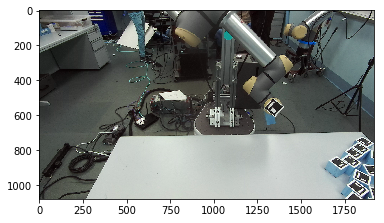

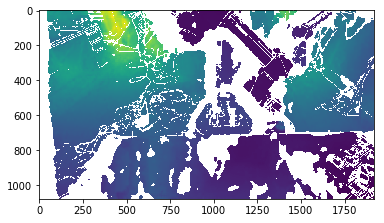

In [10]:
# displaying both images:
from matplotlib import pyplot as plt

for camera in result.keys():
    print('These are the images from camera :',camera)
    plt.imshow(result[camera][0])
    plt.show()
    plt.imshow(result[camera][1])
    plt.show()

## Obtaining Point Clouds

In [11]:
import open3d as o3d

pcds = sensor_module.get_point_clouds()

In [12]:
for camera in result.keys():
    print('This is the point cloud from camera :',camera)
    o3d.visualization.draw_geometries([pcds[camera]])

This is the point cloud from camera : zed_overhead


# Jarvis instance creation:

You now have all you need to create your own Jarvis instance and start using it exactly as you wold within your own module! The only thing of note is that, by default, the command server ignores commands of inactive modules, which, in theory, had to be activated by the UI. In order to remedy that, there is a set of module names that are always set as active. They are: 'UI', 'devel' and 'debug'. While testing your module, it is a good idea to set your module name in jarvis to be 'devel'.

In [13]:
jarvis = Jarvis(str('devel'),sensor_module)

This jarvis instance should now behave exactly as it would if you had received if as an argument to your module - except it bypasses the activity status check because of its name.

In [ ]:
# jarvis.setBaseVelocity([0,0])

In [14]:
joints = jarvis.sensedRightLimbPosition()
print(joints)
joints[5] = joints[5] + 0.1
print(joints)

[4.134375095367432, -3.676096101800436, -0.6770620346069336, -1.5165718358806153, 1.517493724822998, 1.3311810493469238]
[4.134375095367432, -3.676096101800436, -0.6770620346069336, -1.5165718358806153, 1.517493724822998, 1.431181049346924]


In [ ]:
jarvis.setRightLimbPositionLinear(joints,2)

In [ ]:
jarvis.shutdown()

In [15]:
a = jarvis.get_rgbd_images()

# End of Tutorial

In [16]:
a

{'zed_overhead': [array([[[ 61,  61,  55, 255],
          [ 64,  64,  58, 255],
          [ 64,  64,  58, 255],
          ...,
          [162, 163, 153, 255],
          [164, 165, 155, 255],
          [166, 166, 156, 255]],
  
         [[ 60,  60,  54, 255],
          [ 60,  60,  54, 255],
          [ 60,  60,  54, 255],
          ...,
          [161, 167, 155, 255],
          [164, 164, 154, 255],
          [166, 165, 156, 255]],
  
         [[ 60,  60,  54, 255],
          [ 60,  60,  54, 255],
          [ 60,  60,  54, 255],
          ...,
          [161, 165, 157, 255],
          [168, 167, 156, 255],
          [170, 169, 158, 255]],
  
         ...,
  
         [[ 24,  26,  24, 255],
          [ 30,  32,  30, 255],
          [ 38,  39,  37, 255],
          ...,
          [235, 242, 236, 255],
          [239, 245, 240, 255],
          [240, 245, 239, 255]],
  
         [[ 28,  27,  26, 255],
          [ 37,  36,  34, 255],
          [ 43,  44,  42, 255],
          ...,
          [2